# Support Vector Machine Playground 

Support vector machines are a popular classification algorithm. SVMs boil classification down to its core: the algorthim focuses on finding the most efficient linear separator between the classes. This can be extended to a nonlinear separator by using the 'kernel trick'

This notebook provides some simple examples to play with to get some understanding of the method.

<img src="ml_protest.jpg">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

from sklearn import linear_model 

from sklearn.naive_bayes import GaussianNB

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

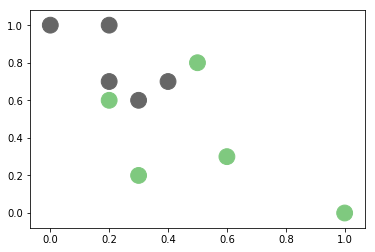

In [2]:
# toy data set: separable
# where does the SVM place the boundary with this data set?
# how is this different than the other mathods?
# why is it doing this?
XX = np.array([[0, 1], [0.2, 1], [0.4, 0.7], [0.3, 0.6], [0.2, 0.7],
               [1, 0], [0.5, 0.4], [0.2, 0.3], [0.3, 0.2], [0.6, 0.3]])
YY = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# toy data set: hard to separate
# what happens here? How is this different than the other methods?
# where are the support vectors?
XX = np.array([[0, 1], [0.2, 1], [0.4, 0.7], [0.3, 0.6], [0.2, 0.7],
                              [1, 0], [0.5, 0.8], [0.2, 0.6], [0.3, 0.2], [0.6, 0.3]])
YY = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

plt.scatter(XX[:, 0], XX[:, 1], marker='o', c=YY, s = 250, cmap=plt.cm.Accent)
plt.show()

In [3]:
# basic problem and mesh prediction grabbing function
# what does this function do?
def MeshPredPlot(X, Y, clf, h=0.02, ss=50, pad=0.1):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Accent , alpha=0.8)
    
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=ss, cmap=plt.cm.Accent )
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

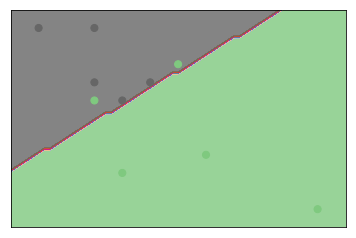

In [4]:
# SVM regularization parameter; why set this to a small value?
C = 10.0
clf = svm.LinearSVC(C=C).fit(XX, YY)

MeshPredPlot(XX, YY, clf)

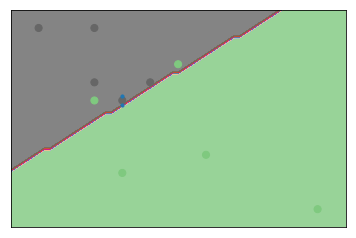

In [5]:
# SVM regularization parameter; why set this to a small value?
C = 10.0
clf = svm.LinearSVC(C=C).fit(XX, YY)

MeshPredPlot(XX, YY, clf)

# look at support vectors

epsilon = 0.025
x1 = np.array([[0.3, 0.6 + epsilon]])
x2 = np.array([[0.3, 0.6 - epsilon]])             

# put the probe points on the plot
plt.scatter(np.vstack((x1, x2))[:, 0], np.vstack((x1, x2))[:, 1], s=10)

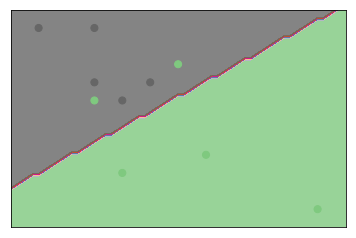

In [6]:
# how is this different from SVM?
clf2 = linear_model.LogisticRegression().fit(XX, YY)

MeshPredPlot(XX, YY, clf2)

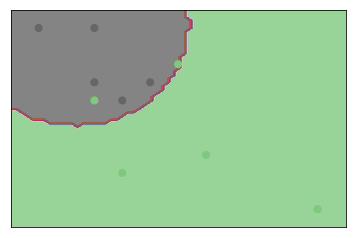

In [7]:
# why does this boundary have this sort of shape? is this better than SVM?
clf3 = GaussianNB().fit(XX, YY)

MeshPredPlot(XX, YY, clf3)

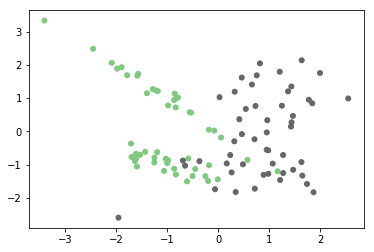

In [8]:
# random data sets; a bit more interesting

np.random.seed(666)

# this one will help you see the shapes of the kernels; 
# you can also see multiclass results
#XX, YY = make_blobs(n_features=2, centers=4)

# a harder classification problem
XX, YY = make_classification(n_features=2, 
                             n_redundant=0, 
                             n_informative=2, 
                             n_classes=2)

plt.scatter(XX[:, 0], XX[:, 1], marker='o', c=YY, s = 25, cmap=plt.cm.Accent)
plt.show()

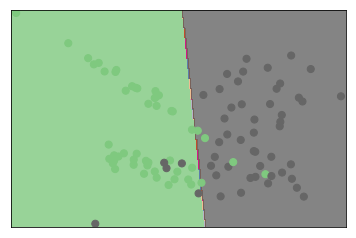

In [9]:
# kernels to try: 'linear' 'rbf' 'poly'
C = 1.0
clfk = svm.SVC(kernel='linear', C=C).fit(XX, YY)

MeshPredPlot(XX, YY, clfk)

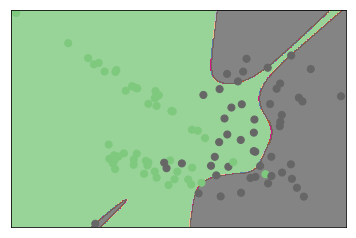

In [10]:
# this as an additional degree parameter; try tuning this!
# this parameter is the degree of the polynomial kernel
# it will allow for differently shaped separation lines
# what is going on with even degrees?

C = 1.0
clfk = svm.SVC(kernel='poly', C=C, degree=9).fit(XX, YY)

MeshPredPlot(XX, YY, clfk)

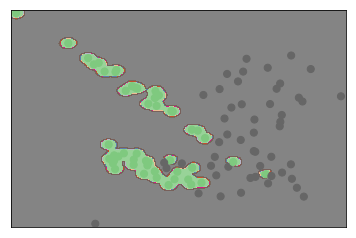

In [11]:
# this has an additional 'gamma' parameter, try tuning this
# this parameter relates to the standard deviation of
# the gaussian kernel; how does this impact the shape of the boundary?

# do certain values of gamma appear to overfit? underfit? how could we test this?

C = 1000.0
clfk = svm.SVC(kernel='rbf', C=C, gamma=100.0).fit(XX, YY)

MeshPredPlot(XX, YY, clfk)